In [1]:
from collections import defaultdict
from unicodedata import normalize as unicodeNormalize
import regex as re

In [5]:
suffixesList = [ 
    "්", 
    "ා", 
    "ැ", 
    "ෑ", 
    "ි", 
    "ී", 
    "ු", 
    "ූ", 
    "ෙ", 
    "ේ", 
    "ෛ", 
    "ො", 
    "ෝ" ,
    "ෞ",
    "ෘ",
    "ෲ",
    "ං"
    ]

In [3]:
def tokenize(text):
    tokens = []
    li = 1
    while li < len(text):
    # for li in range(1, len(text)):
        prevChar, currentChar = text[li - 1], text[li]
        if(currentChar == '\u200d'):
                if(li < len(text) - 1):
                    if(prevChar == suffixesList[0] and (text[li + 1] == 'ර' or text[li + 1] == 'ය' or text[li + 1] == 'ද')):
                        tokens.append(tokens.pop()+currentChar+text[li + 1])
                        li += 1
        elif(currentChar in suffixesList):
            if(li != 1):
                tokens.append(f"{tokens.pop()}{currentChar}")
            else:
                tokens.append(f"{prevChar}{currentChar}")
        else:
            if(li == 1):
                tokens.append(prevChar)
            tokens.append(currentChar)
        li += 1
    return tokens

In [6]:
list('සෞම්‍යා')

['ස', 'ෞ', 'ම', '්', '\u200d', 'ය', 'ා']

In [7]:
tokenize('ශේෂාද්‍රී')

['ශේ', 'ෂා', 'ද්\u200dරී']

In [21]:
raw_data = open('newNames.txt', encoding='utf-8').read()
lines = open('newNames.txt', 'r', encoding='utf-8').readlines()
lines = [line.strip() for line in lines if len(line) > 1]

In [24]:
raw_data = open('SortedSinhalaNamesNew.txt', encoding='utf-8').read()
lines = []
with open('All.txt', 'r', encoding='utf-8') as f:
    allCharacters = []
    for line in f.readlines():
        line = re.sub(r'[^\w]|_|[a-zA-Z]|\u200c', ' ', line)
        line = unicodeNormalize("NFC", line.strip())
        for sub in line.split():
            sub = tokenize(sub)
            if(len(sub) > 1):
                lines.append(sub)
            allCharacters = list(set(allCharacters + sub))

In [8]:
lines = open('All.txt', 'r', encoding='utf-8').readlines()
lines = list(set(lines))
names = []
allCharacters = []
for line in lines:
    line = re.sub(r'[^\w]|_|[a-zA-Z]|\u200c', ' ', line)
    line = unicodeNormalize("NFC", line.strip())
    sub = tokenize(line)
    if(len(sub) > 1):
        names.append(sub)
    allCharacters = list(set(allCharacters + sub))

In [26]:
len(lines)

59287

In [11]:
bigram_names = []
trigram_names = []
for name in names:
    bigram_name=[]
    for i in range(len(name)-1):
        bigram_name.append(name[i]+name[i+1])
    bigram_names.append(bigram_name)

    trigram_name=[]
    if len(name)>3:
        for i in range(len(name)-2):
            trigram_name.append(name[i]+name[i+1]+name[i+2])
        trigram_names.append(trigram_name)
print (bigram_names[0],trigram_names[0])

['පන්', 'න්වි', 'විල', 'ලගේ'] ['පන්වි', 'න්විල', 'විලගේ']


In [25]:
with open('test.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(sorted(allCharacters)))

In [26]:
sorted(allCharacters)

['ං',
 'අ',
 'ආ',
 'ඇ',
 'ඈ',
 'ඉ',
 'ඊ',
 'උ',
 'ඌ',
 'එ',
 'ඒ',
 'ඔ',
 'ඕ',
 'ඖ',
 'ක',
 'ක්',
 'ක්\u200dය',
 'ක්\u200dර',
 'ක්\u200dරා',
 'ක්\u200dරි',
 'ක්\u200dරේ',
 'කා',
 'කැ',
 'කෑ',
 'කි',
 'කී',
 'කු',
 'කූ',
 'කෙ',
 'කේ',
 'කෛ',
 'කො',
 'කෝ',
 'කෞ',
 'කෲ',
 'ඛ',
 'ඛ්\u200dයා',
 'ඛා',
 'ඛි',
 'ග',
 'ග්',
 'ග්\u200dය',
 'ග්\u200dයා',
 'ග්\u200dර',
 'ග්\u200dරා',
 'ග්\u200dරී',
 'ග්\u200dරේ',
 'ගා',
 'ගි',
 'ගී',
 'ගු',
 'ගෙ',
 'ගේ',
 'ගො',
 'ගෝ',
 'ගෞ',
 'ඝ',
 'ඝා',
 'ඟ',
 'ඟි',
 'ඟු',
 'ච',
 'ච්',
 'චා',
 'චි',
 'චු',
 'චෙ',
 'චේ',
 'ජ',
 'ජ්',
 'ජා',
 'ජි',
 'ජී',
 'ජු',
 'ජූ',
 'ජෙ',
 'ජේ',
 'ජො',
 'ජෝ',
 'ඤ',
 'ඤ්',
 'ඤා',
 'ඤෝ',
 'ඥ',
 'ඥා',
 'ට',
 'ට්',
 'ට්\u200dර',
 'ට්\u200dරා',
 'ට්\u200dරි',
 'ට්\u200dරෝ',
 'ටා',
 'ටැ',
 'ටි',
 'ටී',
 'ටු',
 'ටෙ',
 'ටේ',
 'ටෝ',
 'ඩ',
 'ඩ්',
 'ඩා',
 'ඩැ',
 'ඩි',
 'ඩී',
 'ඩු',
 'ඩෙ',
 'ඩේ',
 'ඩො',
 'ඩෝ',
 'ඩෲ',
 'ණ',
 'ණ්',
 'ණ්\u200dය',
 'ණ්\u200dයා',
 'ණා',
 'ණි',
 'ණී',
 'ණු',
 'ණේ',
 'ඬි',
 'ඬේ',
 'ත',
 'ත්',
 'ත්\u200dය',
 'ත්\u2

In [22]:
starting_unigram = defaultdict(int)
ending_unigram = defaultdict(int)
name_length = defaultdict(int)
for name in names:
    starting_unigram[name[0]] += 1
    ending_unigram[name[-1]] += 1
    name_length[len(name)] +=1

starting_bigram = defaultdict(int)
ending_bigram = defaultdict(int)
for name in bigram_names:
    starting_bigram[name[0]] += 1
    ending_bigram[name[-1]] += 1


starting_trigram = defaultdict(int)
ending_trigram = defaultdict(int)
for name in trigram_names:
    starting_trigram[name[0]] += 1
    ending_trigram[name[-1]] += 1

In [23]:
count = {k: v for k, v in sorted(name_length.items(), key=lambda item: item[1], reverse=True)}
count

{4: 15730,
 5: 13956,
 3: 12747,
 6: 8669,
 7: 4305,
 8: 1715,
 2: 1350,
 9: 526,
 10: 176,
 11: 53,
 12: 26,
 13: 13,
 14: 2,
 17: 2}

In [ ]:
count = {k: v for k, v in sorted(count.items())}
count

In [37]:
occurances = list(count.values())
characterNames = list(count.keys())

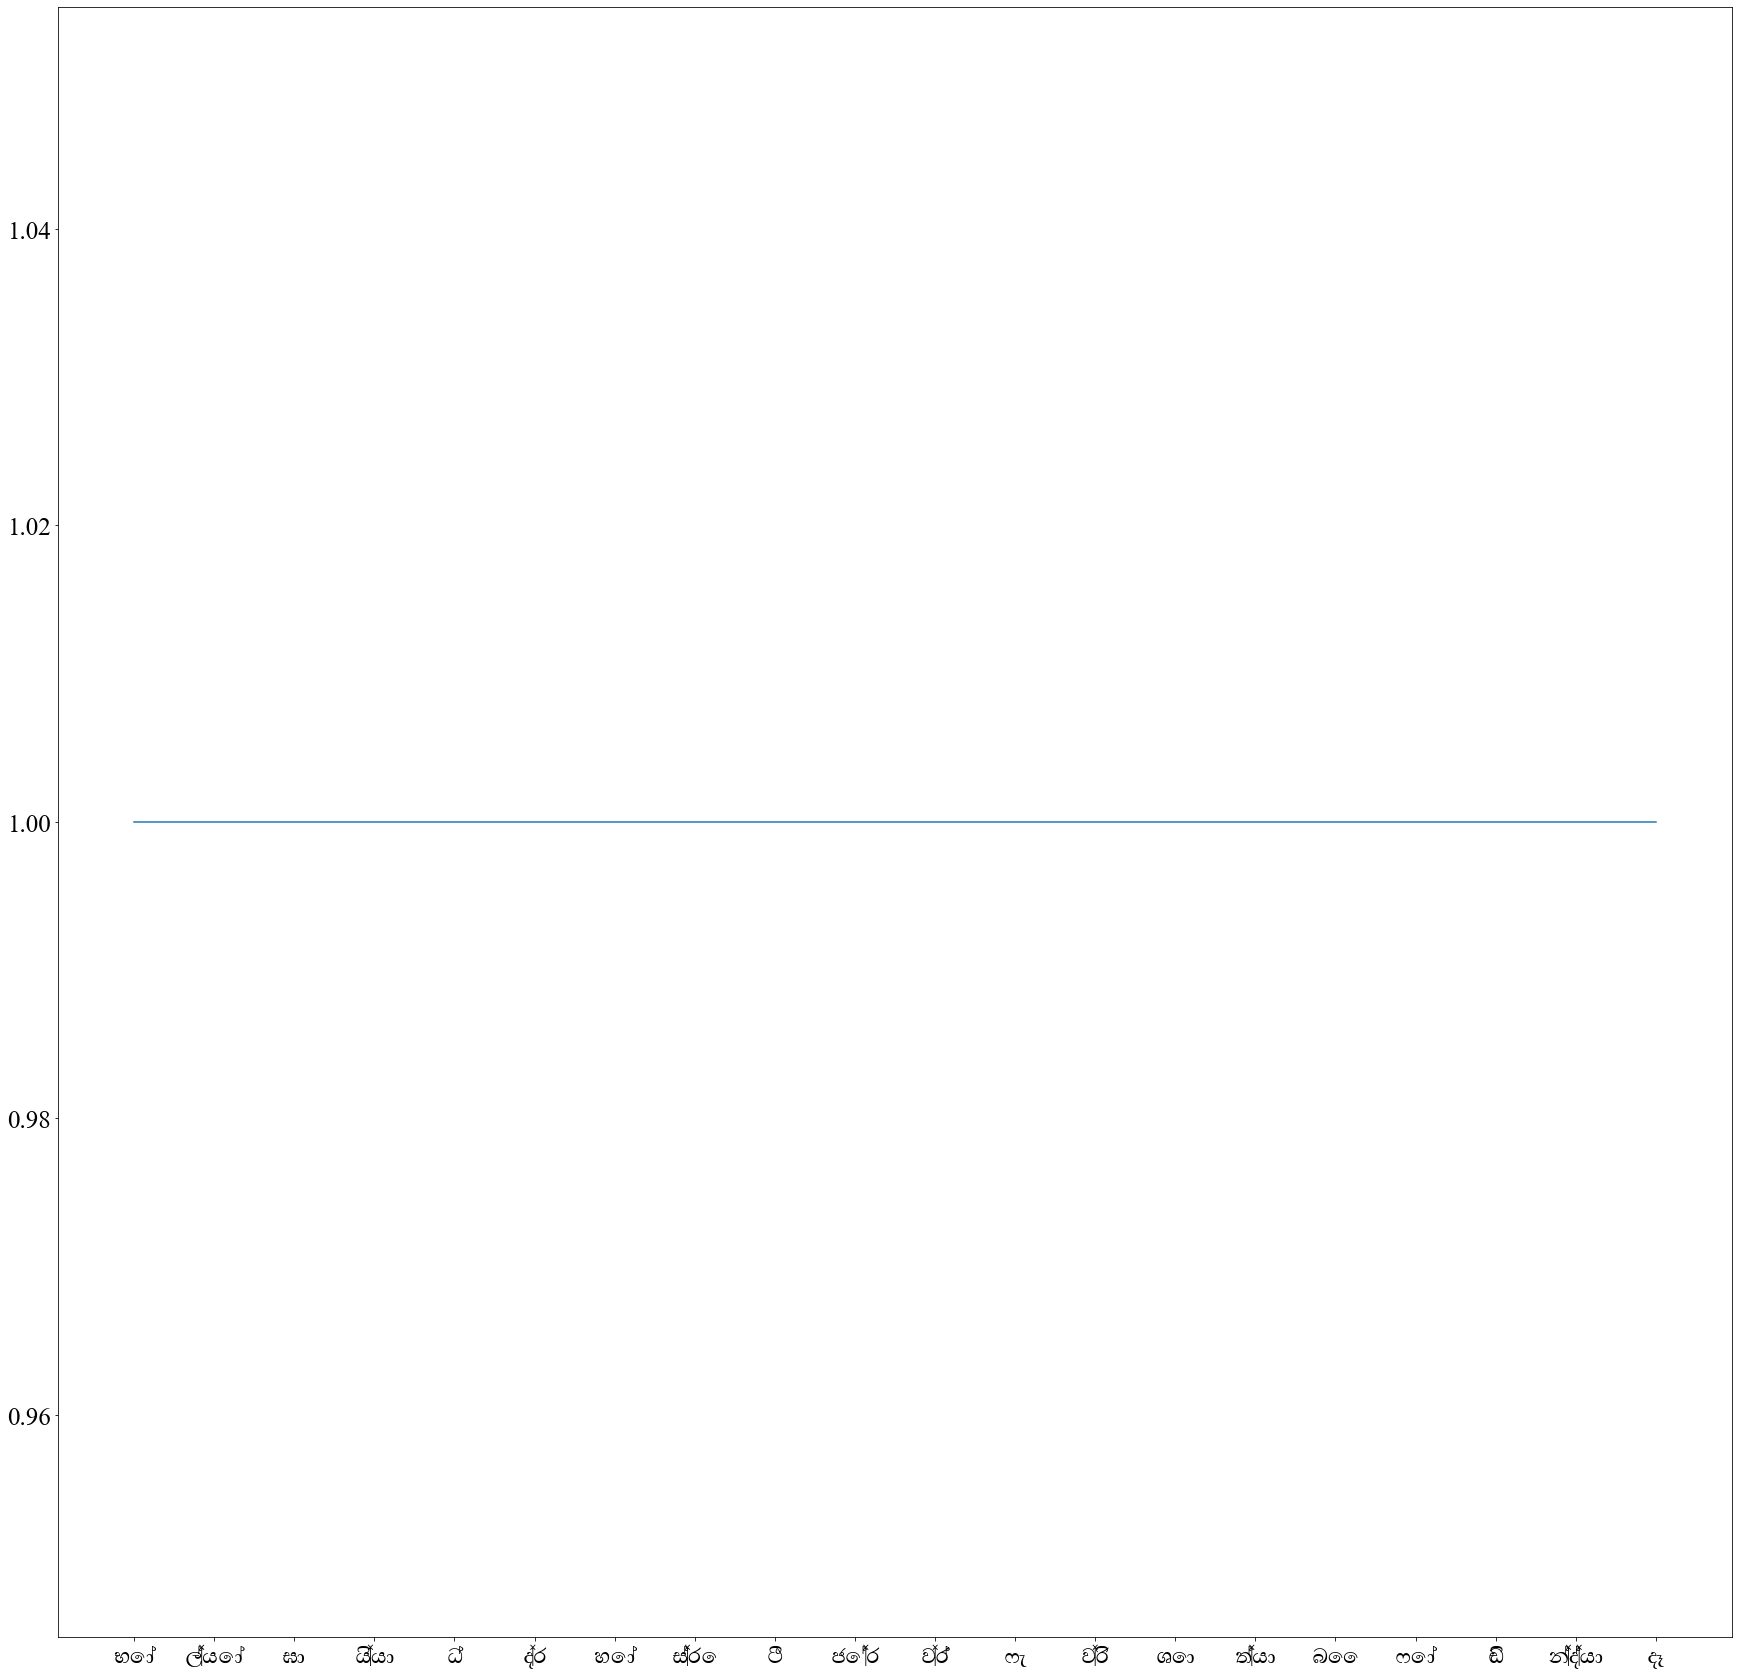

In [41]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['Iskoola Pota', 'sans-serif']
matplotlib.rcParams['font.size'] = 25
plt.figure(figsize=(30, 30))
plt.plot( characterNames[-20:], occurances[-20:])

In [ ]:
plt.pie(occurances[:20], labels=characterNames[:20])

In [43]:
independentVowels = [
    'අ',
    'ආ',
    'ඇ',
    'ඈ',
    'ඉ',
    'ඊ',
    'උ',
    'ඌ',
    'ඍ',
    'ඎ',
    'ඏ',
    'ඐ',
    'එ',
    'ඒ',
    'ඓ',
    'ඔ',
    'ඕ',
    'ඖ'
]

In [44]:
consonants = [
    'ක',
    'ඛ',
    'ග',
    'ඝ',
    'ඞ්',
    'ඟ',
    'ච',
    'ඡ',
    'ජ',
    'ඣ',
    'ඤ',
    'ඥ',
    'ඦ',
    'ට',
    'ඨ',
    'ඩ',
    'ඪ',
    'ණ',
    'ඬ',
    'ත',
    'ථ',
    'ද',
    'ධ',
    'න',
    'ඳ',
    'ප',
    'ඵ',
    'බ',
    'භ',
    'ම',
    'ඹ',
    'ය',
    'ර',
    'ල',
    'ව',
    'ශ',
    'ෂ',
    'ස',
    'හ',
    'ළ',
    'ෆ'
]

In [53]:
sign = [
    '්'
]

In [54]:
dependentVowelSigns = [
    'ා',
    'ැ',
    'ෑ',
    'ි',
    'ී',
    'ු',
    'ූ',
    'ෘ',
    'ෙ',
    'ේ',
    'ෛ'
]

In [55]:
twoPartDependentVowelSigns = [
    'ො',
    'ෝ',
    'ෞ'
]

In [56]:
dependentVowelSign = [
    'ෟ'
]

In [57]:
addidtionalDependentVowelSigns = [
    'ෲ',
    'ෳ'
]

In [58]:
variousSigns = [
    'ං',
    'ඃ'
]

In [68]:
allCharactersPopulated = independentVowels + consonants
for consonant in consonants:
    for suffix in (sign + dependentVowelSigns + twoPartDependentVowelSigns + dependentVowelSign + addidtionalDependentVowelSigns):
        allCharactersPopulated.append(f'{consonant}{suffix}')
    for suffix in (dependentVowelSigns[:-1] + twoPartDependentVowelSigns):
        allCharactersPopulated.append(f'{consonant}{sign[0]}\u200dය{suffix}')
        allCharactersPopulated.append(f'{consonant}{sign[0]}\u200dර{suffix}')

In [69]:
with open('test.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(allCharactersPopulated))

In [70]:
set(allCharacters) - set(allCharactersPopulated)

{'ං',
 'ං\u200dජ',
 'ක්\u200dකී',
 'ක්\u200dය',
 'ක්\u200dර',
 'ක්\u200dෂ',
 'ක්\u200dෂ්',
 'ක්\u200dෂා',
 'ක්\u200dෂි',
 'ක\u200dර',
 'ග්\u200dය',
 'ග්\u200dර',
 'ජේ\u200dර',
 'ට්\u200dර',
 'ණ්\u200dය',
 'ත්\u200dති',
 'ත්\u200dය',
 'ත්\u200dර',
 'ද්\u200dය',
 'ද්\u200dර',
 'ද්\u200d\u200d',
 'දි\u200dය',
 'ද\u200dර',
 'න්\u200dද්\u200dයා',
 'ප්\u200dර',
 'බ්\u200dර',
 'බේ\u200dර',
 'ම්\u200dය',
 'මා\u200dර',
 'ම\u200dර',
 'යි\u200dයා',
 'ල්\u200dය',
 'ව්\u200dය',
 'ව\u200dර්',
 'ව\u200dරි',
 'ශ්\u200dය',
 'ශ්\u200dර',
 'ස්\u200dර',
 'සීි',
 'ෆ්\u200dර',
 'ෆ්\u200dර්',
 '\u200d'}